## Praktikum 1 | Klasifikasi KUCING dan ANJING

### Deskripsi
Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.

### Langkah 1 - Import Library dan sambung drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

### Langkah 2 - Pra Pengolahan Data
Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.

### Langkah 2.1. Pra Pengolahan Data Training

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/machine-learning/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Langkah 2.2. Pra Pengolahan Data Testing

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/machine-learning/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### Langkah 3 - Pembuatan Model CNN

### Langkah 3.1.  - Inisiasi Model CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Langkah 3.3 - Pembuatan Layer Pooling 1

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.5 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Langkah 3.8 - Compile Model CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Penggunaan loss function binary crossentropy dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.

### Langkah 4 - Fit CNN

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 1812s 7s/step - loss: 0.6604 - accuracy: 0.5934 - val_loss: 0.6186 - val_accuracy: 0.6345
Epoch 2/25
250/250 [==============================] - 39s 155ms/step - loss: 0.5781 - accuracy: 0.6925 - val_loss: 0.5288 - val_accuracy: 0.7350
Epoch 3/25
250/250 [==============================] - 43s 171ms/step - loss: 0.5387 - accuracy: 0.7297 - val_loss: 0.5121 - val_accuracy: 0.7515
Epoch 4/25
250/250 [==============================] - 43s 174ms/step - loss: 0.5080 - accuracy: 0.7506 - val_loss: 0.5290 - val_accuracy: 0.7450
Epoch 5/25
250/250 [==============================] - 42s 169ms/step - loss: 0.4881 - accuracy: 0.7630 - val_loss: 0.4694 - val_accuracy: 0.7825
Epoch 6/25
250/250 [==============================] - 39s 154ms/step - loss: 0.4633 - accuracy: 0.7768 - val_loss: 0.4665 - val_accuracy: 0.7830
Epoch 7/25
250/250 [==============================] - 46s 185ms/step - loss: 0.4547 - accuracy: 0.7832 - val_loss: 0.4558 - val_acc

### Langkah 5 - Prediksi dengan 1 Citra
Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.

1/1 [==============================] - 0s 17ms/step


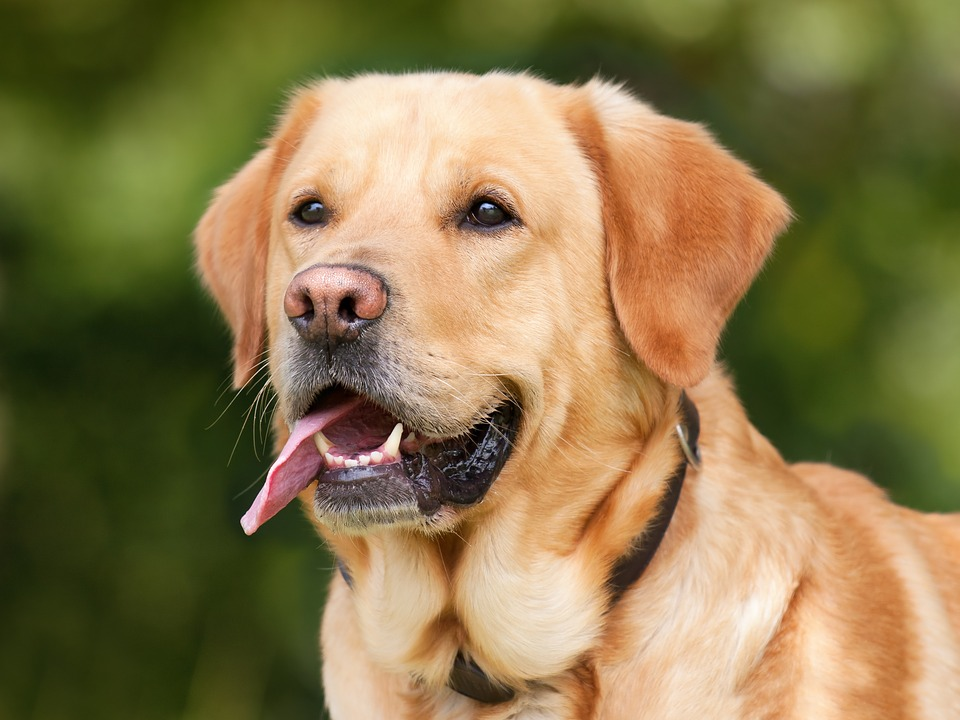

The predicted class is: dog


In [16]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/machine-learning/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

# Display the original image
from IPython.display import Image, display
display(Image(filename='/content/drive/MyDrive/machine-learning/dataset/single_prediction/cat_or_dog_1.jpg'))

# Print the prediction
print(f'The predicted class is: {prediction}')